## Análise Imobiliária Petropolitana - Machine Learning

### Informações do conjunto de dados

1 - valor: valor do imóvel

2 - m2: Metros quadrados (m²) do imóvel

3 - quartos: quantidade de quartos do imóvel

4 - vagas: quantidade de vagas de garagem

5 - banheiros: quantidade de banheiros do imóvel

6 - iptu: valor do iptu

7 - data_anuncio: data do anúncio

8 - link: link do anúncio

9 - imagem: identificação da imagem

10 - data: data de extração

11 - cidade: cidade do imóvel anunciado

12 - bairro: bairro do imóvel anunciado

13 - latitude: latitude do bairro

14 - latitude: longitude do bairro

15 - hash_imagem: chave hash para identificação das imagens do anúncio

16 - hash_imagem: chave hash para identificação das strings do anúncio

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Análise exploratória dos dados

#### Conhecendo a base de dados

In [149]:
base = pd.read_csv(r"C:\Users\Ryan\OneDrive\Documentos\GitHub\analise_imobiliaria_petropolitana\imoveis_petropolis_2025-09-27.csv", sep = ";")

In [150]:
base.head(3)  ## Visualizando os primeiros registros da base de dados

,valor,m2,quartos,vagas,banheiros,iptu,condominio,data_anuncio,link,imagem,data,cidade,bairro,latitude,longitude,hash_imagem,hash_str
0,455000,70,2.0,1.0,2.0,332,751,2025-09-26 21:26:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\809548138667735.webp,2025-09-27,Petrópolis,Itaipava,-22.412700,-43.142100,ffde00000040df7f,ffde00000040df7f
1,430000,56,2.0,1.0,1.0,110,210,2025-09-26 11:12:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\119505194936684.webp,2025-09-27,Petrópolis,Corrêas,-22.442565,-43.139706,ffff7f5330202010,ffff7f5330202010
2,150000,62,1.0,NaN,1.0,NaN,NaN,2025-09-25 14:37:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\686564086666094.webp,2025-09-27,Petrópolis,Quissama,-22.492869,-43.159080,800002dee0e0fcfc,800002dee0e0fcfc


In [151]:
base.shape ## a base possui 4861 linhas e 17 colunas ao total

(4861, 17)

In [152]:
base.info()  ## catalogando o tipo dos atributos e verificando a existência de valores vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         4861 non-null   int64  
 1   m2            4861 non-null   int64  
 2   quartos       4854 non-null   float64
 3   vagas         3833 non-null   float64
 4   banheiros     4844 non-null   float64
 5   iptu          3316 non-null   object 
 6   condominio    2613 non-null   object 
 7   data_anuncio  4861 non-null   object 
 8   link          4861 non-null   object 
 9   imagem        4854 non-null   object 
 10  data          4861 non-null   object 
 11  cidade        4861 non-null   object 
 12  bairro        4861 non-null   object 
 13  latitude      4835 non-null   float64
 14  longitude     4835 non-null   float64
 15  hash_imagem   4854 non-null   object 
 16  hash_str      4854 non-null   object 
dtypes: float64(5), int64(2), object(10)
memory usage: 645.7+ KB


### Fazendo a conversão de tipo para algumas variáveis

In [153]:
base['valor'] = base['valor'].astype(np.float64)
base['quartos'] = base['quartos'].astype('Int64')
base['vagas'] = base['vagas'].astype('Int64')
base['banheiros'] = base['banheiros'].astype('Int64')
base['m2'] = pd.to_numeric(base["m2"], errors = 'coerce')
base['banheiros'] = base['banheiros'].astype('Int64')
base['iptu'] = pd.to_numeric(base["iptu"], errors = 'coerce')
base['iptu'] = base['iptu'].astype('Float64')
base['condominio'] = pd.to_numeric(base["condominio"], errors = 'coerce')
base['condominio'] = base['condominio'].astype('Float64')

In [154]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         4861 non-null   float64
 1   m2            4861 non-null   int64  
 2   quartos       4854 non-null   Int64  
 3   vagas         3833 non-null   Int64  
 4   banheiros     4844 non-null   Int64  
 5   iptu          3315 non-null   Float64
 6   condominio    2609 non-null   Float64
 7   data_anuncio  4861 non-null   object 
 8   link          4861 non-null   object 
 9   imagem        4854 non-null   object 
 10  data          4861 non-null   object 
 11  cidade        4861 non-null   object 
 12  bairro        4861 non-null   object 
 13  latitude      4835 non-null   float64
 14  longitude     4835 non-null   float64
 15  hash_imagem   4854 non-null   object 
 16  hash_str      4854 non-null   object 
dtypes: Float64(2), Int64(3), float64(3), int64(1), object(8)
memory usage: 

Tratando os valores vazios

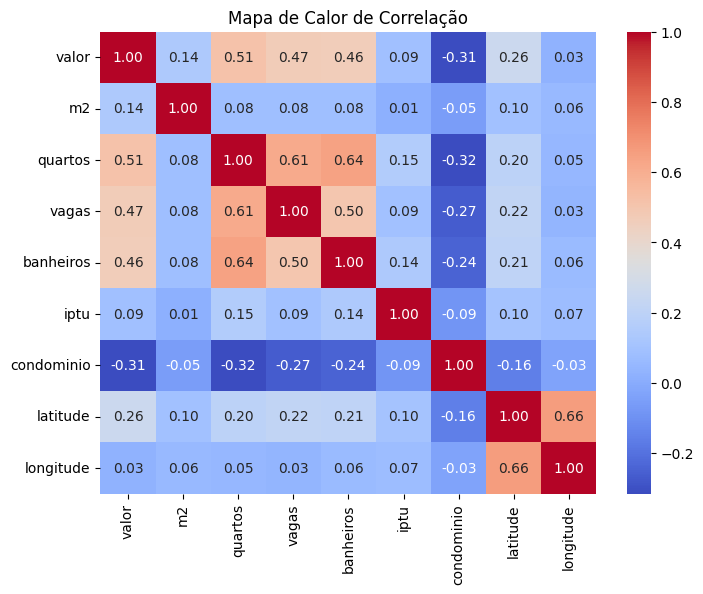

In [155]:
plt.figure(figsize=(8, 6))  ## vamos substituir os valores faltantes da coluna age por uma imputação multivariada
sns.heatmap(base.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f") ## utilizando o gráfico, localizaremos qual dos atributos possui maior correlação coma  variável
plt.title('Mapa de Calor de Correlação') ## assim, agruparemos os valores de idade por determinado atributo para fazer os tratamento dos dados
plt.show()

In [156]:
base['quartos'] = base.quartos.fillna(base.groupby(['banheiros'])['quartos'].transform('median'))
base['vagas'] = base.vagas.fillna(base.groupby(['quartos'])['vagas'].transform('median'))
base['banheiros'] = base.banheiros.fillna(base.groupby(['quartos'])['banheiros'].transform('median'))
base['iptu'] = base.iptu.fillna(base.groupby(['quartos'])['iptu'].transform('median'))
base['condominio'] = base.condominio.fillna(base.groupby(['quartos'])['condominio'].transform('median'))

In [157]:
base = base.dropna()

Verificando a estrutura dos atributos

In [158]:
valores_unicos = []
for i in base.columns[0:17]:
   print(i, ':', len(base[i].astype(str).value_counts()))   ## visualizando os valores únicos de cada coluna
   valores_unicos.append(base[i].astype(str).value_counts())

valor : 598
m2 : 638
quartos : 5
vagas : 5
banheiros : 5
iptu : 1039
condominio : 759
data_anuncio : 3584
link : 4819
imagem : 4819
data : 1
cidade : 1
bairro : 40
latitude : 40
longitude : 40
hash_imagem : 4662
hash_str : 4662


In [159]:
base.describe()  ## visualizando as medidas estatísticas

,valor,m2,quartos,vagas,banheiros,iptu,condominio,latitude,longitude
count,4.826000e+03,4826.000000,4826.0,4826.0,4826.0,4826.0,4826.0,4826.000000,4826.000000
mean,1.493007e+06,652.853709,3.079362,2.349979,2.61666,234.214851,241.19325,-22.455801,-43.166017
std,1.817954e+06,6135.279565,1.198324,1.393834,1.397023,193.742959,304.373122,0.060531,0.034057
min,2.850000e+02,1.000000,1.0,1.0,1.0,1.0,1.0,-22.542270,-43.227685
25%,4.900000e+05,76.000000,2.0,1.0,1.0,125.0,1.993,-22.509981,-43.191274
50%,9.000000e+05,150.000000,3.0,2.0,2.0,210.0,3.4,-22.442565,-43.168100
75%,1.700000e+06,300.000000,4.0,3.0,4.0,283.0,496.0,-22.412700,-43.142100
max,2.250000e+07,220000.000000,5.0,5.0,5.0,999.0,999.0,-22.252300,-43.072539


In [160]:
base.bairro.value_counts()

bairro
Itaipava                 1011
Centro                    711
Pedro do Rio              378
Corrêas                   370
Araras                    314
Quitandinha               229
Nogueira                  204
Mosela                    123
Retiro                    123
Samambaia                 120
Valparaíso                118
Castelanea                112
Bingen                    111
Independência              99
Coronel Veiga              91
Cuiabá                     79
Alto da Serra              75
São Sebastião              68
Bonsucesso                 64
Fazenda Inglesa            57
Morin                      44
Saldanha Marinho           41
Carangola                  36
Duarte Silveira            36
Quarteirão Ingelheim       32
Posse                      28
Cascatinha                 24
Itamarati                  21
Quarteirão Brasileiro      20
Quissama                   20
Duchas                     17
Simeria                    15
Caxambu                    13
Chá

<Axes: title={'center': 'Qtde de Imóveis x Barro'}, xlabel='bairro'>

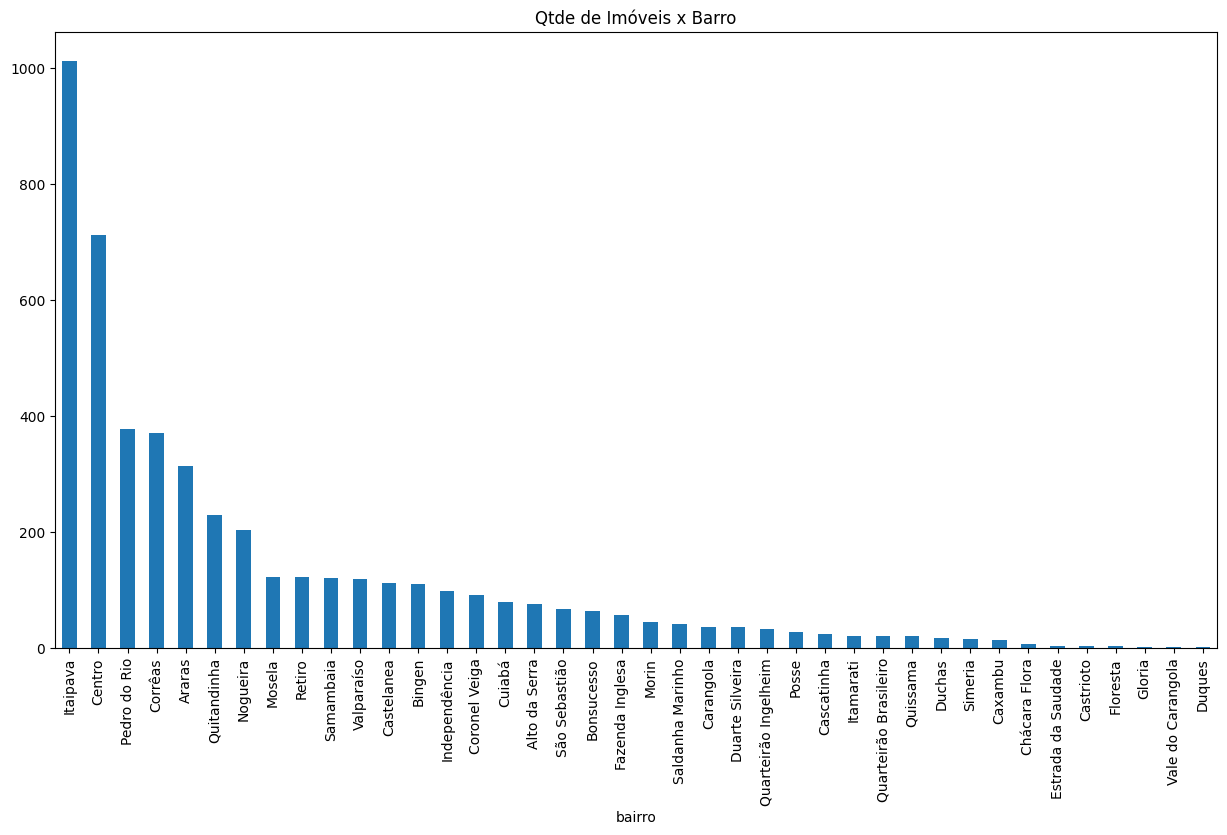

In [161]:
plt.figure(figsize=(15, 8))
base.bairro.value_counts().plot(kind = 'bar', title = "Qtde de Imóveis x Barro")  ## analisando a quantidade de imóveis por bairro

<Axes: ylabel='valor'>

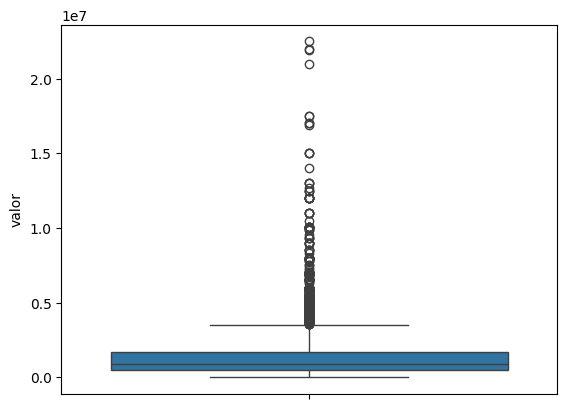

In [162]:
sns.boxplot(base['valor'])

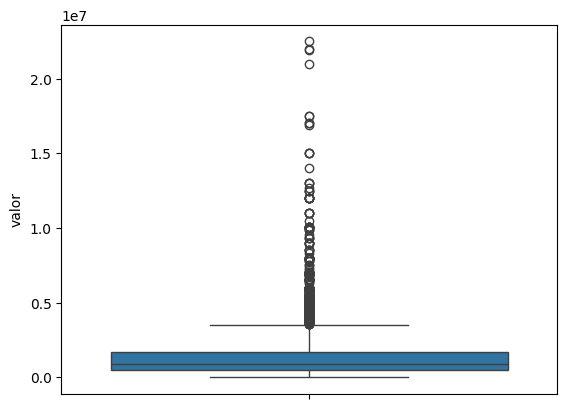

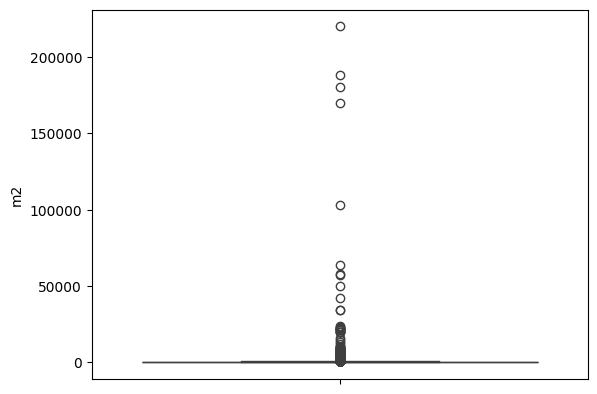

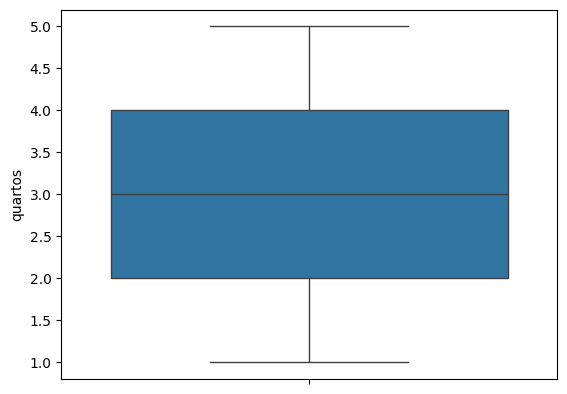

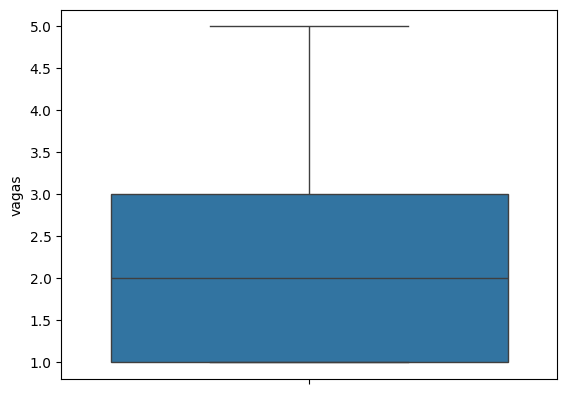

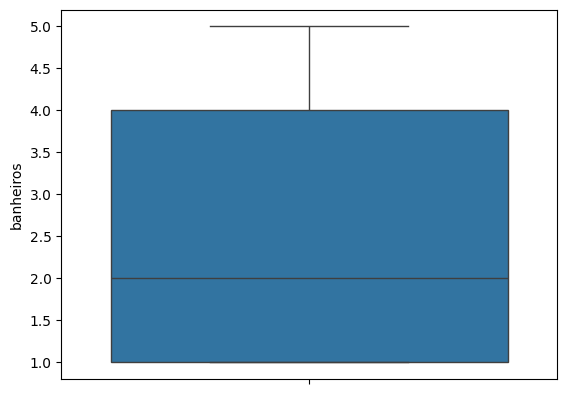

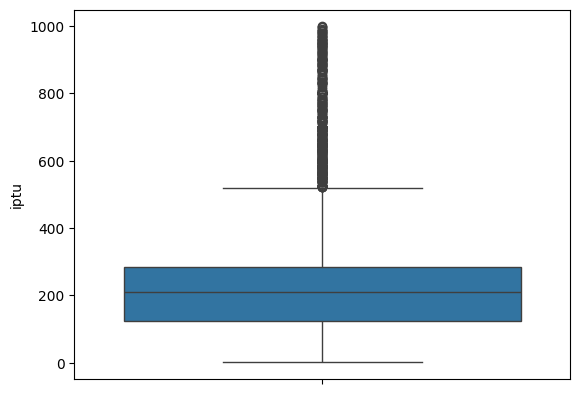

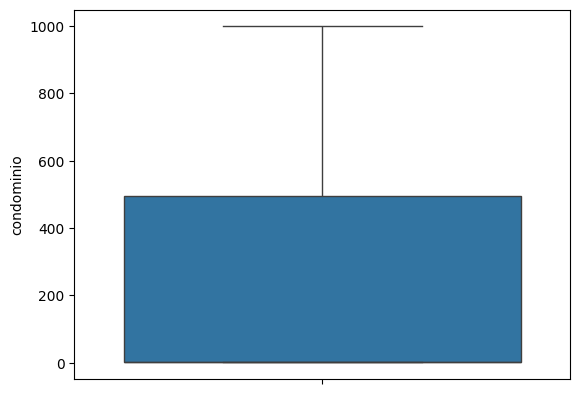

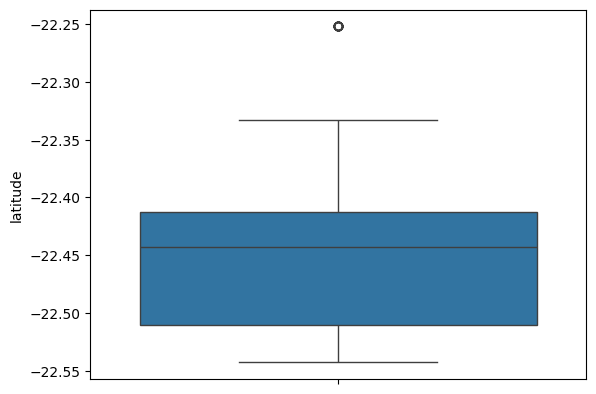

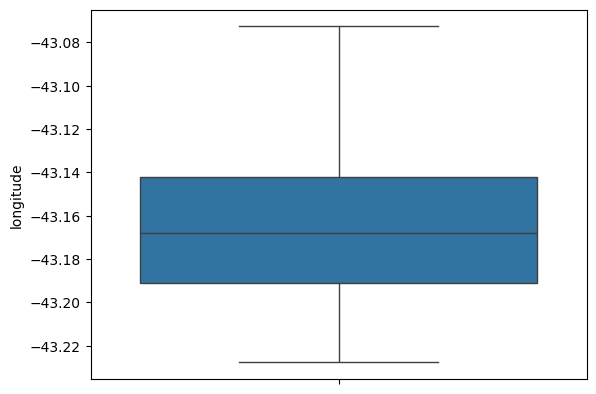

In [163]:
numericas = base.select_dtypes(include = ['number'])
for col in numericas.columns:
    sns.boxplot(y = numericas[col], data=numericas)
    plt.show()

In [164]:
df_numericas = base.select_dtypes(include=['number']).copy()
colunas_numericas = df_numericas.columns

# 2. Iterar e aplicar o Caping IQR
for col in colunas_numericas:
    # 2.1. Calcular Quartis e IQR
    Q1 = df_numericas[col].quantile(0.25)
    Q3 = df_numericas[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_superior = Q3 + (1.5 * IQR)
    

    df_numericas[col] = np.where(
        df_numericas[col] > limite_superior,
        limite_superior,
        df_numericas[col]
    )
    

base[colunas_numericas] = df_numericas

print("Caping de Outliers aplicado em todas as colunas numéricas usando o método IQR.")

Caping de Outliers aplicado em todas as colunas numéricas usando o método IQR.


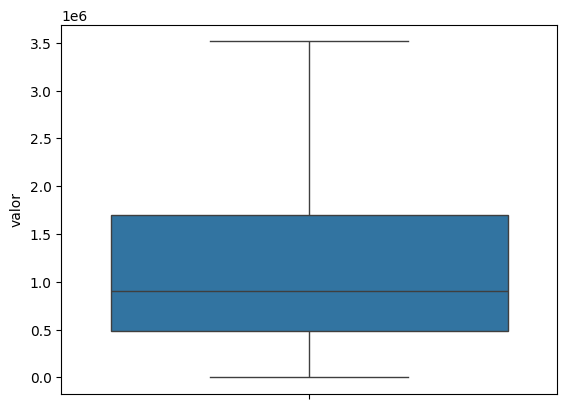

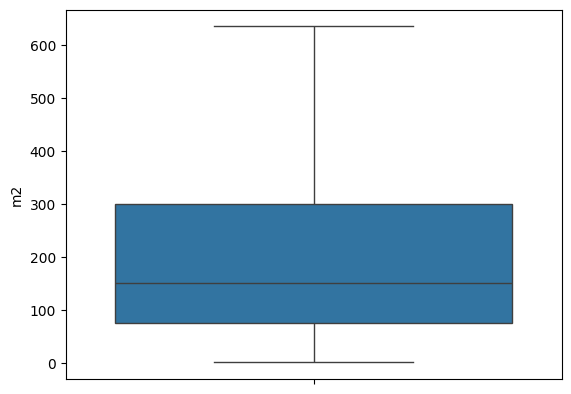

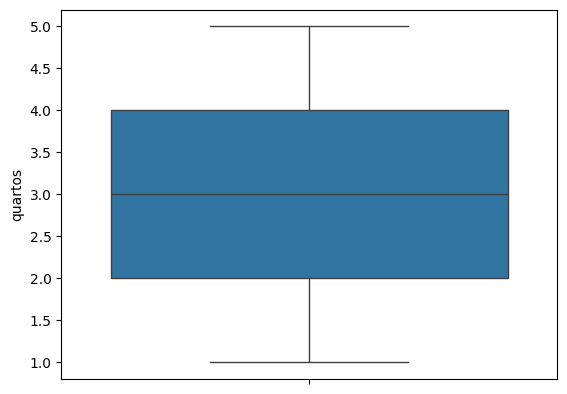

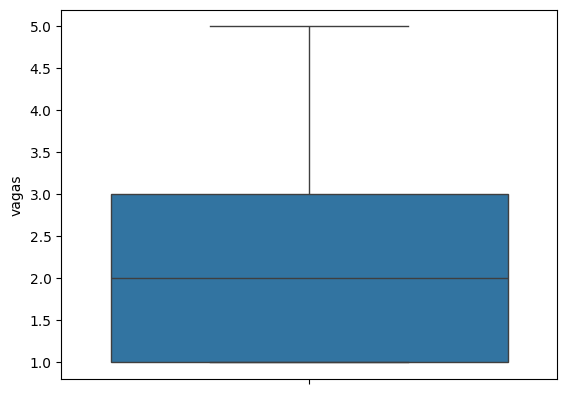

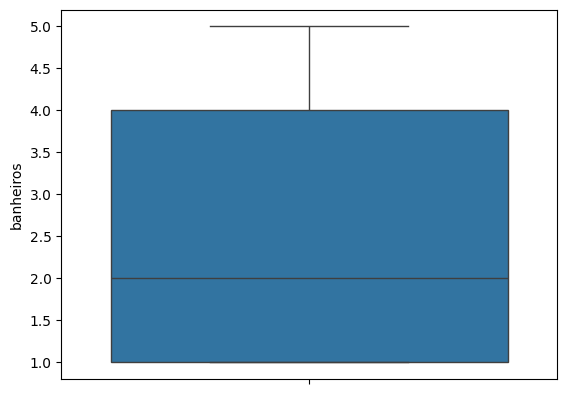

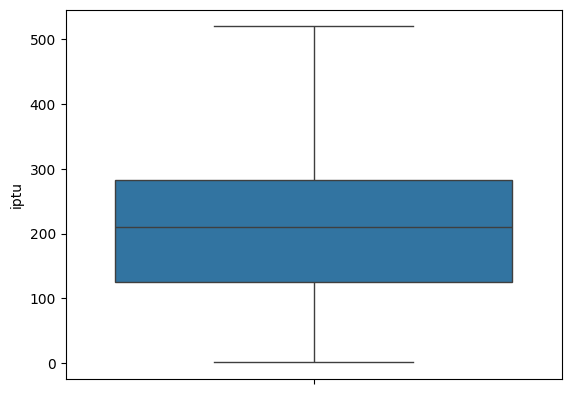

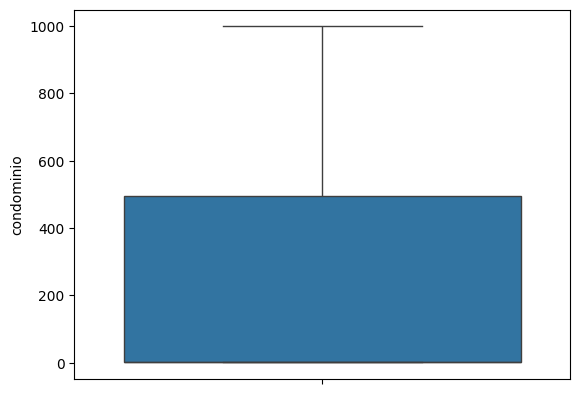

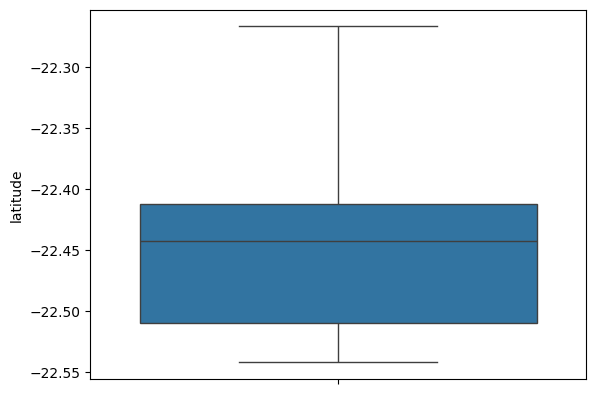

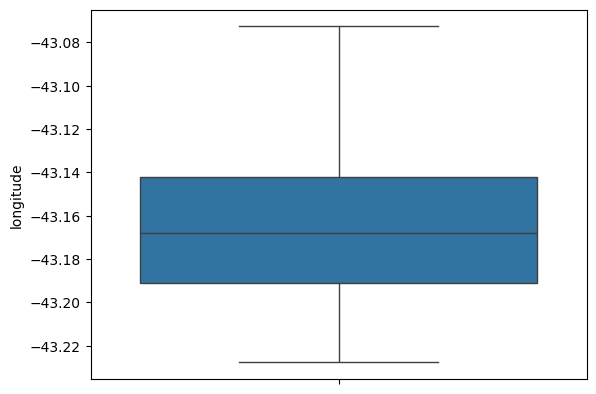

In [165]:
numericas = base.select_dtypes(include = ['number'])
for col in numericas.columns:
    sns.boxplot(y = numericas[col], data=numericas)
    plt.show()

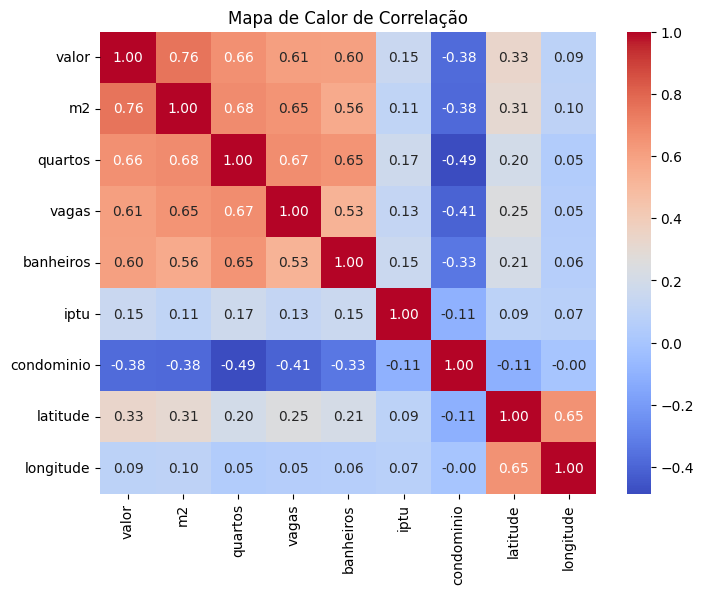

In [166]:
plt.figure(figsize=(8, 6))  
sns.heatmap(base.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Mapa de Calor de Correlação') 
plt.show()  ## revisitando a correlação após a limpeza dos outliers

--- Parâmetros do Modelo ---
Coeficiente (M): 0.76
Intercepto (B): 9.91


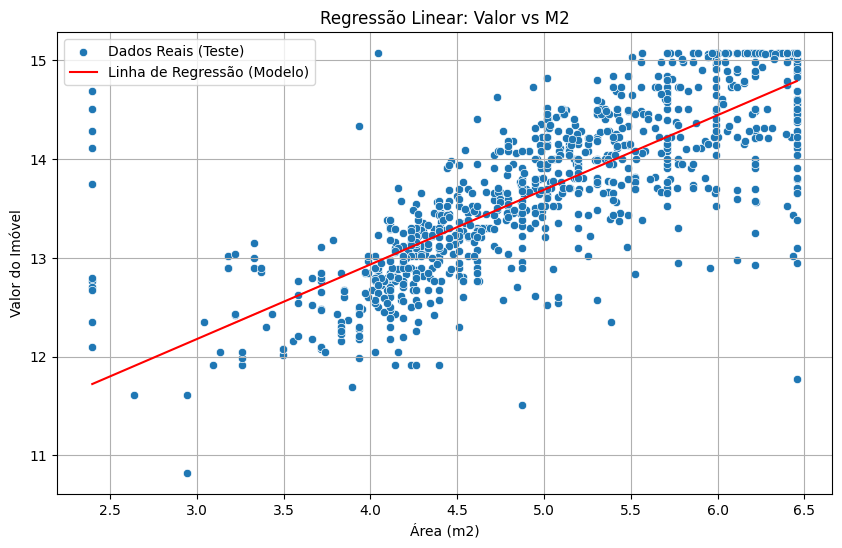

In [168]:
X = np.log1p(base[['m2']])
y = np.log1p(base['valor'])    


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelo_rl = LinearRegression()

modelo_rl.fit(X_train, y_train)

print("--- Parâmetros do Modelo ---")
print(f"Coeficiente (M): {modelo_rl.coef_[0]:.2f}") 
print(f"Intercepto (B): {modelo_rl.intercept_:.2f}")

y_pred = modelo_rl.predict(X_test)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_test['m2'], y=y_test, label='Dados Reais (Teste)')

sns.lineplot(x=X_test['m2'], y=y_pred, color='red', label='Linha de Regressão (Modelo)')

plt.title('Regressão Linear: Valor vs M2')
plt.xlabel('Área (m2)')
plt.ylabel('Valor do Imóvel')
plt.legend()
plt.grid(True)
plt.show()

--- Resultado da Regressão Linear Múltipla (Log-Log) ---
R2 Score: 0.6918
Coeficientes (Elasticidade):
  m2_log: 0.4671
  quartos_log: 0.3096
  vagas_log: 0.2000
  banheiros_log: 0.3263
  condominio_log: -0.0317


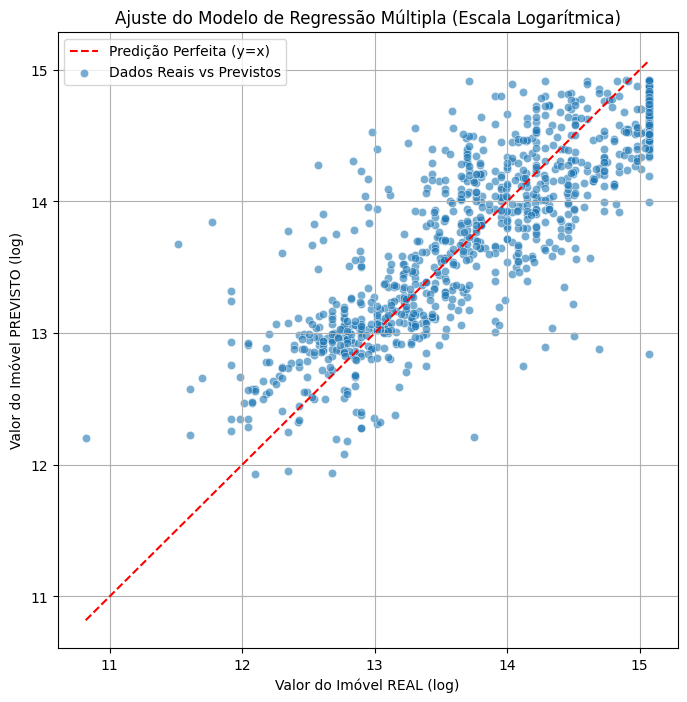

In [169]:
colunas_para_log = [
    'valor',       
    'm2',
    'quartos',
    'vagas',
    'banheiros',
    'condominio'   
]

for col in colunas_para_log:
    base[f'{col}_log'] = np.log1p(base[col])
y_multi = base['valor_log']

features_log = [
    'm2_log', 
    'quartos_log', 
    'vagas_log', 
    'banheiros_log',
    'condominio_log'
]
X_multi = base[features_log]

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

modelo_multi_rl = LinearRegression()
modelo_multi_rl.fit(X_train_multi, y_train_multi)

y_pred_multi = modelo_multi_rl.predict(X_test_multi)
r2 = r2_score(y_test_multi, y_pred_multi)

print("--- Resultado da Regressão Linear Múltipla (Log-Log) ---")
print(f"R2 Score: {r2:.4f}")
print("Coeficientes (Elasticidade):")
for i, feature in enumerate(features_log):
    print(f"  {feature}: {modelo_multi_rl.coef_[i]:.4f}")

plt.figure(figsize=(8, 8))


limites = [min(y_test_multi.min(), y_pred_multi.min()), 
           max(y_test_multi.max(), y_pred_multi.max())]
plt.plot(limites, limites, color='red', linestyle='--', label='Predição Perfeita (y=x)')


sns.scatterplot(x=y_test_multi, y=y_pred_multi, alpha=0.6, label='Dados Reais vs Previstos')

plt.title('Ajuste do Modelo de Regressão Múltipla (Escala Logarítmica)')
plt.xlabel('Valor do Imóvel REAL (log)')
plt.ylabel('Valor do Imóvel PREVISTO (log)')
plt.legend()
plt.grid(True)

# 5. Exibir
plt.show()